In [1]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
%matplotlib ipympl

In [2]:
df = pd.read_excel('cleaned_data.xlsx')
df 

,Site Name,Site Use,Date,Sample ID,Location ID,Latitude,Longitude,11ClPF3OUDS,4:2FTS,6:2FTS,...,PFNA,PFNDCA,PFOA,PFOS,PFOSA,PFPA,PFPES,PFTEDA,PFTRIDA,PFUNDCA
0,4-S Ranch WRF,Wastewater Treatment Plants,03/03/2021,BFP Cake,BFP CAKE,33.014402,-117.112003,0.019843,0.023307,0.059843,...,0.011969,0.007874,0.020787,0.056693,0.066142,0.020472,0.040945,0.066142,0.022677,0.020472
1,4-S Ranch WRF,Wastewater Treatment Plants,11/10/2020,BFP Cake,BFP CAKE,33.014402,-117.112003,0.019704,0.023153,0.059113,...,0.012315,0.007882,0.021182,0.054187,0.068966,0.020690,0.040394,0.064039,0.022660,0.020690
2,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,01/06/2021,21010600414,JW_BS_CAKE,33.805270,-118.280636,0.011955,0.005978,0.011955,...,0.005978,0.034209,0.007178,0.168043,0.017885,0.005978,0.011955,0.005978,0.005978,0.005978
3,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,04/07/2021,21040700441,JW_BS_CAKE,33.805270,-118.280636,0.022238,0.007410,0.014851,...,0.007410,0.014851,0.007410,0.110815,0.007410,0.007410,0.007410,0.014851,0.014851,0.007410
4,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,07/06/2021,21070600411,JW_BS_CAKE,33.805270,-118.280636,0.022677,0.007564,0.015143,...,0.007564,0.016758,0.008994,0.050427,0.007564,0.007564,0.007564,0.015143,0.015143,0.007564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,Yreka City WWTP,Wastewater Treatment Plants,10/20/2021,21J0884-01 Biosolids,BIOSOLIDS,41.744100,-122.630730,0.019085,0.022453,0.056132,...,0.011507,0.025260,0.020208,0.053326,0.064552,0.028066,0.039293,0.061746,0.021611,0.019646
880,Yuba City WWTF,Wastewater Treatment Plants,03/18/2021,202103190266,BIO-001,39.108603,-121.612298,0.014537,0.048967,0.048967,...,0.014537,0.014537,0.014537,0.030604,0.014537,0.014537,0.073451,0.014537,0.014537,0.014537
881,Yuba City WWTF,Wastewater Treatment Plants,05/18/2021,202105190414,BIO-001,39.108603,-121.612298,0.014938,0.050088,0.050088,...,0.014938,0.014938,0.014938,0.028998,0.014938,0.014938,0.074692,0.014938,0.014938,0.014938
882,Yuba City WWTF,Wastewater Treatment Plants,08/25/2021,202108260557,BIO-001,39.108603,-121.612298,0.011602,0.034991,0.034991,...,0.011602,0.018416,0.013444,0.060773,0.013260,0.011602,0.011602,0.011602,0.011602,0.011602


In [3]:
df.columns

Index(['Site Name', 'Site Use', 'Date', 'Sample ID', 'Location ID', 'Latitude',
       'Longitude', '11ClPF3OUDS', '4:2FTS', '6:2FTS', '8:2FTS', '9ClPF3ONS',
       'ETFOSA', 'ETFOSE', 'MEFOSA', 'MEFOSE', 'NETFOSAA', 'NMEFOSAA', 'PFBA',
       'PFBSA', 'PFDOA', 'PFDSA', 'PFHA', 'PFHPA', 'PFHPSA', 'PFHXSA', 'PFNA',
       'PFNDCA', 'PFOA', 'PFOS', 'PFOSA', 'PFPA', 'PFPES', 'PFTEDA', 'PFTRIDA',
       'PFUNDCA'],
      dtype='object')

In [4]:
uses = ['Airport', 'Wastewater Treatment Plants', 'Industrial - Bulk Fuel Terminal/Refinery']
df = df[df['Site Use'].isin(uses)]
df['Site Use'].value_counts()

Site Use
Airport                                     291
Wastewater Treatment Plants                 286
Industrial - Bulk Fuel Terminal/Refinery    236
Name: count, dtype: int64

# Deminsionalty Reduction
The data has a lot of deminsions many of which are highly corralated. Lets try some reduction and visuilazation methods

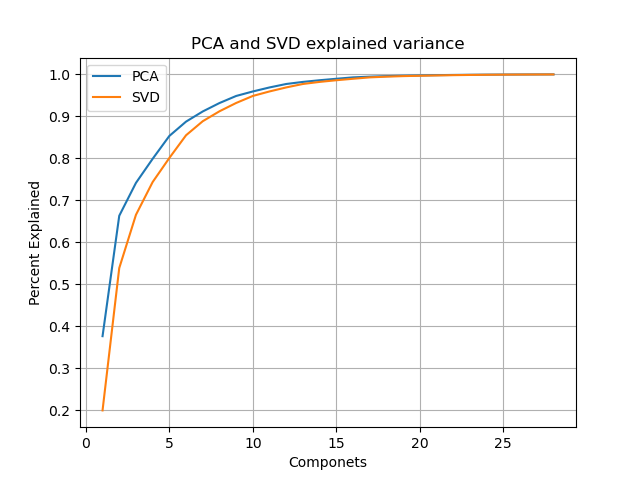

In [5]:
# get the data
idx_length = 7
data = df[df.columns[idx_length :]].to_numpy()

# PCA
percent_explained_pca = []
percent_explained_svd = []
max_componets = df.shape[1] - idx_length 
num_comps = list(range(1, max_componets))
best_num_comps = 8
for i in num_comps:
    test_pca = PCA(n_components=i, random_state=42)
    test_pca.fit(data)
    percent_explained_pca.append(sum(test_pca.explained_variance_ratio_))

    test_svd = TruncatedSVD(n_components=i, random_state=42)
    test_svd.fit(data)
    percent_explained_svd.append(sum(test_svd.explained_variance_ratio_))

    # save best models for later
    if i == best_num_comps:
        svd = test_svd
        svd_data = svd.transform(data)
        
        pca = test_pca
        pca_data = pca.transform(data)


# make dataframes for each group for later use
df_idx = df[df.columns[:idx_length ]]

df_pca = pd.DataFrame(data = pca_data, columns = ['pca_%s' % i for i in range(best_num_comps)])
df_pca = pd.concat([df_idx, df_pca], axis = 1)

df_svd= pd.DataFrame(data = svd_data, columns = ['svd_%s' % i for i in range(best_num_comps)])
df_pca = pd.concat([df_idx, df_svd], axis = 1)


                       
plt.plot(num_comps, percent_explained_pca, label = 'PCA')
plt.plot(num_comps, percent_explained_svd, label = 'SVD')
plt.xlabel("Componets")
plt.ylabel("Percent Explained")
plt.title('PCA and SVD explained variance')
plt.grid()
plt.legend()
plt.show()

# Multidimensional scaling
MDA is a deminsion reduction technique used to visiliuse high deminsionalty data in lower deminsion. From the sklearn documentation

"Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space. In general, MDS is a technique used for analyzing similarity or dissimilarity data. It attempts to model similarity or dissimilarity data as distances in a geometric spaces. " https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling

I will use it here to see if there is any diffence in distribution between the PCA, SVD and untransformed data


In [6]:
embedding = MDS(n_components=3, normalized_stress='auto', random_state=42)
pca_ploting_data = embedding.fit_transform(pca_data)
svd_ploting_data = embedding.fit_transform(svd_data)
normal_ploting_data = embedding.fit_transform(data)

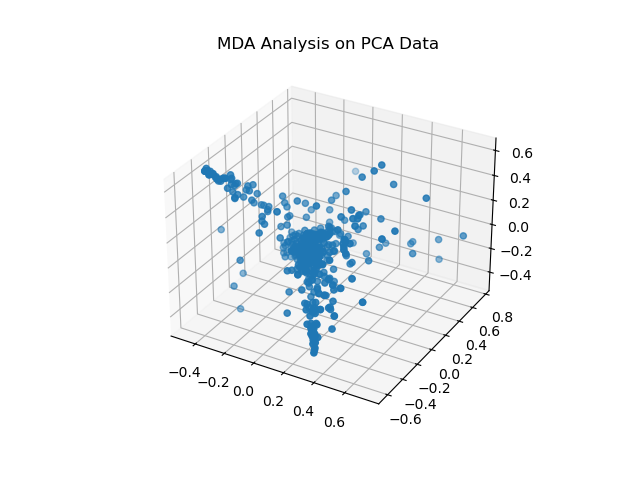

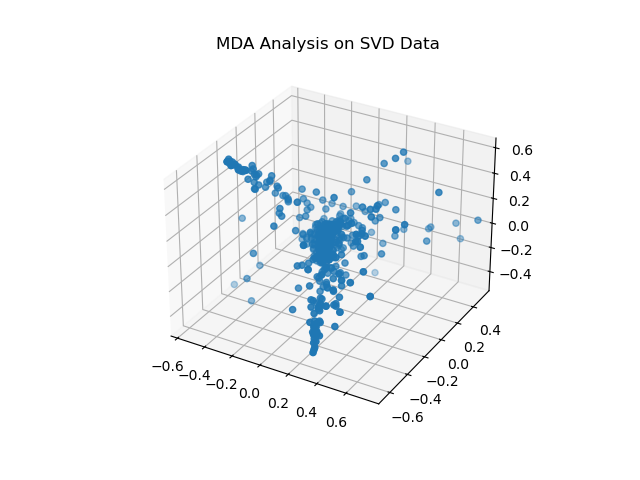

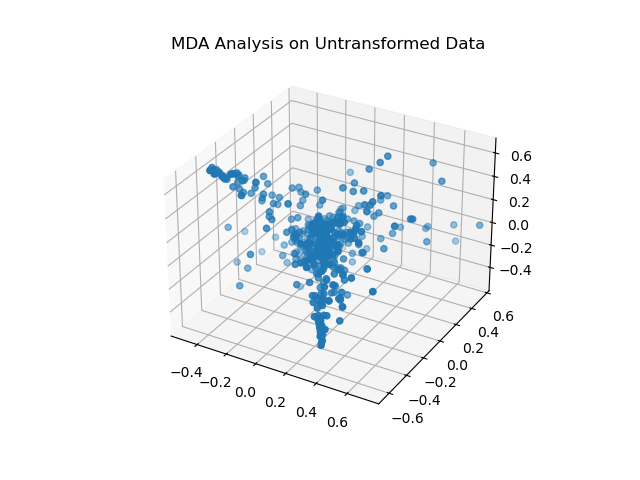

In [7]:
def make_3d_graph(data, title, groups = None, filter = None, lables = None):
    
    if filter is not None:
        data = np.delete(data, filter, axis=0)
        groups = np.delete(groups, filter, axis=0)
    
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    if groups is not None:
        ax.scatter(x, y, z, c = groups)
        ax.legend(np.unique(groups))
    else:
        ax.scatter(x, y, z)
    ax.axes.set_xlim3d(left= min(x), right=max(x)) 
    ax.axes.set_ylim3d(bottom=min(y), top=max(y)) 
    ax.axes.set_zlim3d(bottom=min(z), top=max(z)) 
    ax.title.set_text(title)
    
    plt.show()

make_3d_graph(pca_ploting_data, 'MDA Analysis on PCA Data')
make_3d_graph(svd_ploting_data, 'MDA Analysis on SVD Data')
make_3d_graph(normal_ploting_data, 'MDA Analysis on Untransformed Data')

## Clustering

/var/folders/9m/6xlv5p9n1x7flz794y6xj8fc0000gn/T/ipykernel_22477/937459080.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca_groups'] = pca_groups
/var/folders/9m/6xlv5p9n1x7flz794y6xj8fc0000gn/T/ipykernel_22477/937459080.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['svd_groups'] = svd_groups
/var/folders/9m/6xlv5p9n1x7flz794y6xj8fc0000gn/T/ipykernel_22477/937459080.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

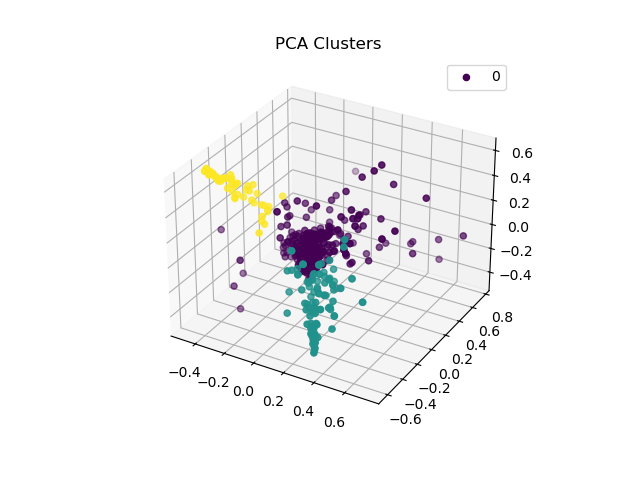

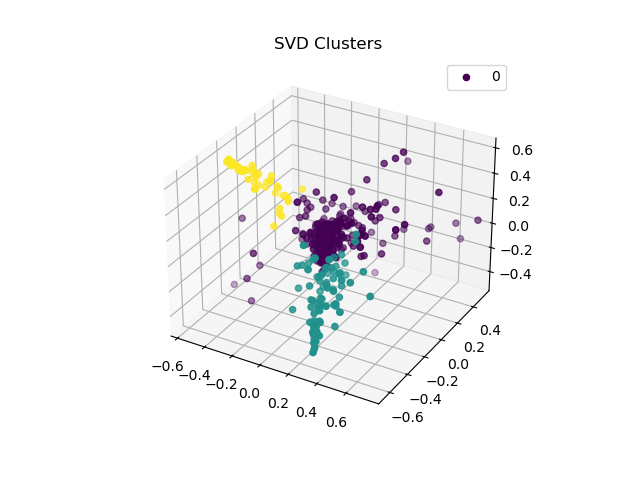

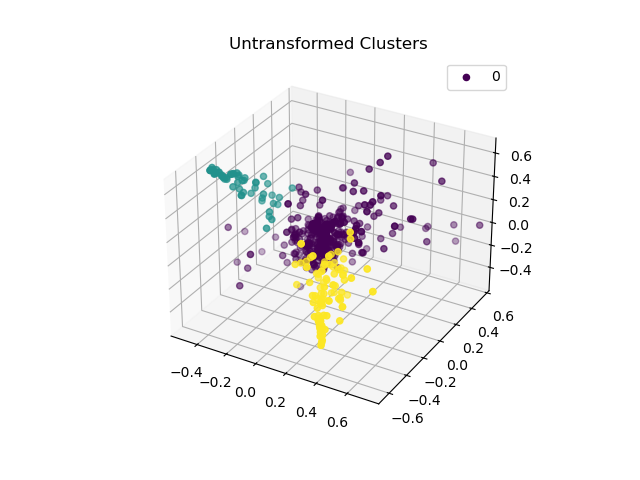

In [8]:
num_clusters = 3

pca_clustering = KMeans(n_clusters=num_clusters, n_init = 'auto', random_state=42).fit(pca_data)
pca_groups = pca_clustering.labels_

svd_clustering = KMeans(n_clusters=num_clusters, n_init = 'auto', random_state=42).fit(svd_data)
svd_groups = svd_clustering.labels_

normal_clustering = KMeans(n_clusters=num_clusters, n_init = 'auto', random_state=42).fit(data)
normal_groups = normal_clustering.labels_

df['pca_groups'] = pca_groups
df['svd_groups'] = svd_groups
df['normal_groups'] = normal_groups

make_3d_graph(pca_ploting_data, 'PCA Clusters', groups = pca_groups)
make_3d_graph(svd_ploting_data, 'SVD Clusters', groups = svd_groups)
make_3d_graph(normal_ploting_data, 'Untransformed Clusters', groups = normal_groups)

In [14]:
site_name_use_dict = {}
for site_name in df['Site Name'].unique():
    df_temp = df[df['Site Name'] == site_name]
    site_name_use_dict[site_name] = df_temp['Site Use'].unique()[0]

df_site_groups = df.drop(columns = ['Date', 'Site Use',  'Sample ID', 'Location ID', 'Latitude', 'Longitude', 'pca_groups', 'svd_groups', 'normal_groups'])
df_site_groups = df_site_groups.groupby('Site Name').mean().reset_index()
test_data = df_site_groups[df_site_groups.columns[1:]].to_numpy()

predicted_y = normal_clustering.predict(test_data)
true_y = df_site_groups['Site Name'].apply(lambda val: site_name_use_dict.get(val))


In [28]:
df_site_groups

,Site Name,11ClPF3OUDS,4:2FTS,6:2FTS,8:2FTS,9ClPF3ONS,ETFOSA,ETFOSE,MEFOSA,MEFOSE,...,PFNA,PFNDCA,PFOA,PFOS,PFOSA,PFPA,PFPES,PFTEDA,PFTRIDA,PFUNDCA
0,4-S Ranch WRF,0.019773,0.023230,0.059478,0.030950,0.032250,0.025406,0.069128,0.017282,0.020177,...,0.012142,0.007878,0.020985,0.055440,0.067554,0.020581,0.040669,0.065091,0.022669,0.020581
1,A.K. Warren Water Resource Facility,0.015899,0.006079,0.012168,0.012168,0.009834,0.138023,0.138023,0.138023,0.138023,...,0.006079,0.020644,0.007021,0.099485,0.010739,0.006079,0.008413,0.009888,0.009834,0.006079
2,Adelanto WWTP,0.019765,0.023059,0.056471,0.031059,0.032941,0.025412,0.070588,0.017412,0.020235,...,0.012235,0.008000,0.020706,0.056471,0.065882,0.020235,0.040000,0.065882,0.022588,0.020235
3,Alan Horton WWTP,0.018329,0.021371,0.053890,0.029142,0.031339,0.023313,0.064529,0.016167,0.018642,...,0.011310,0.024994,0.019301,0.051693,0.063604,0.064408,0.036659,0.061406,0.021116,0.019081
4,"Allied Aviation Fueling Company, Incorporation",0.016886,0.017005,0.127025,0.020963,0.016886,0.016892,0.016886,0.016919,0.016886,...,0.051348,0.017727,0.096968,0.165649,0.017616,0.029348,0.018282,0.017008,0.019687,0.029439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,"Vopak Terminal Los Angeles, Incorporation",0.035561,0.022372,0.018481,0.031185,0.013947,0.040071,0.032956,0.044566,0.034240,...,0.015795,0.015329,0.015096,0.404360,0.022450,0.014258,0.018481,0.012023,0.019144,0.016944
106,WRCRWA Regional WWRF,0.017120,0.019844,0.050514,0.026811,0.028482,0.021515,0.059458,0.014913,0.019419,...,0.010406,0.081265,0.019780,0.073099,0.058096,0.024169,0.034392,0.056272,0.019691,0.017272
107,Watsonville WWTP,0.023926,0.023890,0.025771,0.023890,0.023963,0.014948,0.045464,0.006943,0.187353,...,0.012490,0.017474,0.014689,0.048760,0.008672,0.015728,0.008395,0.010374,0.008053,0.016831
108,Yreka City WWTP,0.019085,0.022453,0.056132,0.030873,0.030873,0.024418,0.067359,0.016559,0.019366,...,0.011507,0.025260,0.020208,0.053326,0.064552,0.028066,0.039293,0.061746,0.021611,0.019646


In [24]:
def label_permute_compare(true_, predicted, filter = None):
    """Gets the combination of labels that results in the highest accuracy. Modified from week 2."""
    if filter is not None:
        true_ = np.delete(true_, filter, axis=0)
        predicted = np.delete(predicted, filter, axis=0)
    
    perms = itertools.permutations(np.unique(true_))
    
    acc = 0.0
    best_order = 0
    for perm in perms:
        print(perm)
        pred = [perm[i] for i in predicted]
        pred_acc = sum([1 for x, y, in zip(list(true_), pred) if x == y]) / len(true_)
        if pred_acc > acc:
            acc = pred_acc
            best_order = perm
            
    return acc, best_order

label_permute_compare(true_y, predicted_y, filter = None)

('Airport', 'Industrial - Bulk Fuel Terminal/Refinery', 'Wastewater Treatment Plants')
('Airport', 'Wastewater Treatment Plants', 'Industrial - Bulk Fuel Terminal/Refinery')
('Industrial - Bulk Fuel Terminal/Refinery', 'Airport', 'Wastewater Treatment Plants')
('Industrial - Bulk Fuel Terminal/Refinery', 'Wastewater Treatment Plants', 'Airport')
('Wastewater Treatment Plants', 'Airport', 'Industrial - Bulk Fuel Terminal/Refinery')
('Wastewater Treatment Plants', 'Industrial - Bulk Fuel Terminal/Refinery', 'Airport')


(0.9090909090909091,
 ('Wastewater Treatment Plants',
  'Airport',
  'Industrial - Bulk Fuel Terminal/Refinery'))

In [25]:
predicted_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0],
      dtype=int32)

In [26]:
true_y

0                   Wastewater Treatment Plants
1                   Wastewater Treatment Plants
2                   Wastewater Treatment Plants
3                   Wastewater Treatment Plants
4      Industrial - Bulk Fuel Terminal/Refinery
                         ...                   
105    Industrial - Bulk Fuel Terminal/Refinery
106                 Wastewater Treatment Plants
107                 Wastewater Treatment Plants
108                 Wastewater Treatment Plants
109                 Wastewater Treatment Plants
Name: Site Name, Length: 110, dtype: object

In [13]:
df_site_groups

,Site Name,11ClPF3OUDS,4:2FTS,6:2FTS,8:2FTS,9ClPF3ONS,ETFOSA,ETFOSE,MEFOSA,MEFOSE,...,PFNA,PFNDCA,PFOA,PFOS,PFOSA,PFPA,PFPES,PFTEDA,PFTRIDA,PFUNDCA
0,4-S Ranch WRF,0.019773,0.023230,0.059478,0.030950,0.032250,0.025406,0.069128,0.017282,0.020177,...,0.012142,0.007878,0.020985,0.055440,0.067554,0.020581,0.040669,0.065091,0.022669,0.020581
1,A.K. Warren Water Resource Facility,0.015899,0.006079,0.012168,0.012168,0.009834,0.138023,0.138023,0.138023,0.138023,...,0.006079,0.020644,0.007021,0.099485,0.010739,0.006079,0.008413,0.009888,0.009834,0.006079
2,Adelanto WWTP,0.019765,0.023059,0.056471,0.031059,0.032941,0.025412,0.070588,0.017412,0.020235,...,0.012235,0.008000,0.020706,0.056471,0.065882,0.020235,0.040000,0.065882,0.022588,0.020235
3,Alan Horton WWTP,0.018329,0.021371,0.053890,0.029142,0.031339,0.023313,0.064529,0.016167,0.018642,...,0.011310,0.024994,0.019301,0.051693,0.063604,0.064408,0.036659,0.061406,0.021116,0.019081
4,"Allied Aviation Fueling Company, Incorporation",0.016886,0.017005,0.127025,0.020963,0.016886,0.016892,0.016886,0.016919,0.016886,...,0.051348,0.017727,0.096968,0.165649,0.017616,0.029348,0.018282,0.017008,0.019687,0.029439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,"Vopak Terminal Los Angeles, Incorporation",0.035561,0.022372,0.018481,0.031185,0.013947,0.040071,0.032956,0.044566,0.034240,...,0.015795,0.015329,0.015096,0.404360,0.022450,0.014258,0.018481,0.012023,0.019144,0.016944
106,WRCRWA Regional WWRF,0.017120,0.019844,0.050514,0.026811,0.028482,0.021515,0.059458,0.014913,0.019419,...,0.010406,0.081265,0.019780,0.073099,0.058096,0.024169,0.034392,0.056272,0.019691,0.017272
107,Watsonville WWTP,0.023926,0.023890,0.025771,0.023890,0.023963,0.014948,0.045464,0.006943,0.187353,...,0.012490,0.017474,0.014689,0.048760,0.008672,0.015728,0.008395,0.010374,0.008053,0.016831
108,Yreka City WWTP,0.019085,0.022453,0.056132,0.030873,0.030873,0.024418,0.067359,0.016559,0.019366,...,0.011507,0.025260,0.020208,0.053326,0.064552,0.028066,0.039293,0.061746,0.021611,0.019646


In [11]:
site_name_use_dict.values()

dict_values(['Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Industrial - Bulk Fuel Terminal/Refinery', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Industrial - Bulk Fuel Terminal/Refinery', 'Industrial - Bulk Fuel Terminal/Refinery', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Wastewater Treatment Plants', 'Airport', 'Wastew

In [ ]:
# def get_top_x_analyes(df, column, num_analytes):
#     group_dict = {}
#     groups = df[column].unique()
#     for group in groups:
#         df_temp = df[df[column] == group]
#         # groups_numbs 
#         s = df_temp[df_temp.columns[idx_length :-3]].sum().sort_values(ascending=False, inplace=False)
#         top_cols = s.index[:num_analytes]

#         group_dict[group] = top_cols
        
#     return group_dict

# print(get_top_x_analyes(df, 'pca_groups', 5))

In [ ]:
# print(df['Site Name'].value_counts())
# use_dict = {'BIOSOLIDS':0, 'BIO-001':1, 'Industrial - Bulk Fuel Terminal/Refinery':2}
# df['site_use_groups'] = df['Site Use'].apply(lambda val: use_dict.get(val, 3))

# site_use_groups = df.site_use_groups.to_numpy()
# del_idx = np.argwhere(site_use_groups == 3)

In [ ]:
# def my_guess(r

In [ ]:
# print(df['Site Name'].value_counts())
# use_dict = {'Airport':0, 'Wastewater Treatment Plants':1, 'Industrial - Bulk Fuel Terminal/Refinery':2}
# df['site_use_groups'] = df['Site Use'].apply(lambda val: use_dict.get(val, 3))

# site_use_groups = df.site_use_groups.to_numpy()
# del_idx = np.argwhere(site_use_groups == 3)


In [ ]:
# def label_permute_compare(true_, predicted, filter = None):
#     """Gets the combination of labels that results in the highest accuracy. Modified from week 2."""
#     if filter is not None:
#         true_ = np.delete(true_, filter, axis=0)
#         predicted = np.delete(predicted, filter, axis=0)
    
#     perms = itertools.permutations(range(len(np.unique(predicted))))
    
#     acc = 0.0
#     best_order = 0
#     for perm in perms:
#         pred = [perm[i] for i in predicted]
#         pred_acc = sum([1 for x, y, in zip(list(true_), pred) if x == y]) / len(true_)
#         if pred_acc > acc:
#             acc = pred_acc
#             best_order = perm
            
#     return acc

# pca_acc = label_permute_compare(site_use_groups, pca_groups_x, filter = del_idx)

# print("PCA clustering gave an accuracy of %s compared to site use groups" % pca_acc)
# make_3d_graph(pca_ploting_data, 'PCA Clusters', groups = site_use_groups, filter = del_idx)

# svc_acc = label_permute_compare(site_use_groups, svd_groups, filter = del_idx)
# print("svc clustering gave an accuracy of %s compared to site use groups" % svc_acc)
# make_3d_graph(svd_ploting_data, 'SVD Clusters', groups = site_use_groups, filter = del_idx)


# normal_acc = label_permute_compare(site_use_groups, normal_groups, filter = del_idx)
# print("Untransformed clustering gave an accuracy of %s compared to site use groups" % normal_acc)
# make_3d_graph(normal_ploting_data, 'Untransformed Clusters', groups = site_use_groups, filter = del_idx)
# normal_acc = label_permute_compare(site_use_groups, normal_groups, filter = del_idx)

